<a href="https://colab.research.google.com/github/FadeZx/DT-467_ChessMoveTracking/blob/PieceDetection/2_2024_DT_467_ChessMove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset preparation / Preprocessing

In [ ]:
#import dataset1 no oriented
!pip install -U gdown
!gdown --folder https://drive.google.com/drive/folders/1-NaFCqOomOCt5EpskeDT7ez1_DZ_8k3m

Retrieving folder contents
Processing file 1sw65JD2BTd6b24ZpiMPrdlT8ckvBI1hq frame0.jpg
Processing file 1U1DJyDGWuZTt6NWBym1LsdVNK2yIwYkX frame55.jpg
Processing file 1fPd0Lz1UfnW9_upQgWLJ88GTQgB-mPZE frame56.jpg
Processing file 1kGfo6dLN1r7jxE1I9gkHV6yg4zkc5UtW frame57.jpg
Processing file 1xfroP4wMUfdZQmhCnuMHlStbhnxgfY-t frame58.jpg
Processing file 1tvoxfNZ2GMn8AXzukujHpGgRf7MnVTcO frame59.jpg
Processing file 1dSX1jhIAd2Qzhn2H1Vg_EeQsdZPZKTVh frame65.jpg
Processing file 1YUHENekfVEOntvmrjN3YVw78W5YpIGoQ frame66.jpg
Processing file 1U4_aK_ElkDd5jLTmnL8ErH0AjTzmB0zH frame70.jpg
Processing file 1sVsDBEOa3P-bUaL3fLpQxiVjM7cFB4oW frame75.jpg
Processing file 1oaQ2XhaxxuQIN21uQd89L7o5PTHA9C_v frame101.jpg
Processing file 1dgHlb1EYu1hEqm_axz1ODmwqIlCSPZrT frame155.jpg
Processing file 15jYU9ZE6YIAI4acgKym5tmzadMoPE93U frame159.jpg
Processing file 1g3JN_NMHdPKmwrME2q9ff6PIrM5Q0f85 frame173.jpg
Processing file 182W7crKEvSJXevr0Jye3eLZCRknwvM22 frame183.jpg
Processing file 1hUuj4SuLqMOyzrrFAggJtS

In [ ]:
#import dataset2
!wget https://drive.google.com/uc?id=1PVeMgv5z_Ua3T33htKAFX27jkkOPHTM_ -O frame_0.jpg
!wget https://drive.google.com/uc?id=1vE7q6qMD_xz8dAvpcEYHL1zC1CspNwPa -O frame_25.jpg
!wget https://drive.google.com/uc?id=1METUm9TQIcKrt-T-1IUDBV_AABLlKct0 -O frame_98.jpg
!wget https://drive.google.com/uc?id=1AnbrrLArLNQMsFsaLytmqi7L_YQ7tiSV -O frame_160.jpg
!wget https://drive.google.com/uc?id=18RpEPCsn4FUu4qOX3ZHPcJL2MMAPj9vk -O frame_212.jpg
!wget https://drive.google.com/uc?id=19RXLuPMF11k3_0ExXxtC69o0yY4uQF4y -O frame_386.jpg
!wget https://drive.google.com/uc?id=11QnEx8AlLdcIMJZPeCY_Gb8YzB4i_rrs -O frame_471.jpg
!wget https://drive.google.com/uc?id=1asMzKguloR7uNA6kB5JpFki2SaFL8f7K -O frame_935.jpg
!wget https://drive.google.com/uc?id=1Js08IbU-jfzT7q960kIOWXHV4YcSgK1w -O frame_1149.jpg
!wget https://drive.google.com/uc?id=1jV00hYmoqeOW8cJgvp-LdJYJgfstMONm-O frame_1183.jpg

In [ ]:
def order_points(pts):
    # pts is a list of 4 (x, y) tuples
    rect = np.zeros((4, 2), dtype="float32")

    # top-left has the smallest sum, bottom-right the largest
    s = np.sum(pts, axis=1)
    rect[0] = pts[np.argmin(s)]  # top-left
    rect[2] = pts[np.argmax(s)]  # bottom-right

    # top-right has smallest difference, bottom-left the largest
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]  # top-right
    rect[3] = pts[np.argmax(diff)]  # bottom-left

    return rect


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("dataset1_nolabel/frame0.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set the internal number of corners (for 8x8 board → 7x7 internal corners)
pattern_size = (7, 7)

# Try to find the corners
found, corners = cv2.findChessboardCorners(gray, pattern_size)

# Visualize result
if found:
    img_drawn = cv2.drawChessboardCorners(img.copy(), pattern_size, corners, found)
    plt.imshow(cv2.cvtColor(img_drawn, cv2.COLOR_BGR2RGB))
    plt.title("Detected Chessboard Corners")
    plt.axis("off")
    plt.show()
else:
    print("Chessboard corners not found.")

Chessboard corners not found.


# Chess Piece Detection

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 126.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [11]:
from roboflow import Roboflow
rf = Roboflow(api_key="wwaFUSeAIZGOcoFOrd6n")
project = rf.workspace("chess-project-dm31c").project("chess-full-21f0i")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chess-Pieces-2 in yolov11:: 100%|██████████| 1398/1398 [00:00<00:00, 6346.48it/s]


In [13]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

model.train(
  data=dataset.location + "/data.yaml",
  epochs=25,
  imgsz=640,
  batch=16,
  lr0=0.001
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 66.2MB/s]


Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Chess-Pieces-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]

Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

 23        [16, 19, 22]  1    433207  ultralytics.nn.modules.head.Detect           [13, [64, 128, 256]]          
YOLO11n summary: 181 layers, 2,592,375 parameters, 2,592,359 gradients, 6.5 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1145.3±565.7 MB/s, size: 43.4 KB)


train: Scanning /content/Chess-Pieces-2/train/labels... 606 images, 0 backgrounds, 0 corrupt: 100%|██████████| 606/606 [00:00<00:00, 2335.00it/s]

train: /content/Chess-Pieces-2/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.1723f368cb55b72f8ca7b156c2e49636.jpg: 1 duplicate labels removed
train: /content/Chess-Pieces-2/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.d03f10eb42b8457d49bc01cae0ddc5b2.jpg: 1 duplicate labels removed
train: /content/Chess-Pieces-2/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.dde36ac157e6acfb3629b1478f2d6363.jpg: 1 duplicate labels removed
train: New cache created: /content/Chess-Pieces-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 666.4±451.3 MB/s, size: 43.6 KB)


val: Scanning /content/Chess-Pieces-2/valid/labels... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<00:00, 1410.02it/s]

val: New cache created: /content/Chess-Pieces-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         3G      1.544      4.118      1.134        218        640: 100%|██████████| 38/38 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all         58        386     0.0216      0.744      0.134     0.0834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.02G      1.311      2.872      1.022        199        640: 100%|██████████| 38/38 [00:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         58        386      0.821      0.142      0.378      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.22G      1.242       2.02      1.003        217        640: 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         58        386      0.478      0.384      0.492       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.24G      1.234      1.758      1.004        152        640: 100%|██████████| 38/38 [00:10<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         58        386      0.451      0.558      0.545      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.25G      1.097      1.474     0.9704        256        640: 100%|██████████| 38/38 [00:10<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         58        386      0.539      0.751      0.743      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      3.46G      1.087       1.31     0.9689        168        640: 100%|██████████| 38/38 [00:10<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         58        386      0.625      0.854      0.808      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.47G      1.052      1.193       0.97        232        640: 100%|██████████| 38/38 [00:10<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         58        386      0.762      0.828      0.885       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.49G      1.036      1.123     0.9605        169        640: 100%|██████████| 38/38 [00:10<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         58        386       0.87      0.842       0.91      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25       3.5G      0.989      1.023     0.9609        214        640: 100%|██████████| 38/38 [00:10<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         58        386      0.917      0.867      0.938      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.52G     0.9965     0.9896     0.9595        176        640: 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         58        386      0.911      0.929      0.972      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      3.53G      0.992     0.9599     0.9581        140        640: 100%|██████████| 38/38 [00:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         58        386      0.921      0.927      0.961      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.54G      0.953     0.8998     0.9389        191        640: 100%|██████████| 38/38 [00:10<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         58        386      0.944      0.956      0.978       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.56G     0.9926     0.9262     0.9555        224        640: 100%|██████████| 38/38 [00:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         58        386      0.962      0.964      0.982      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25       3.8G     0.9621     0.8694     0.9475        186        640: 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         58        386      0.963      0.963      0.981      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.82G     0.9433     0.8525     0.9349        199        640: 100%|██████████| 38/38 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         58        386      0.967      0.947      0.982      0.789


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.83G      0.891     0.7614     0.9504        207        640: 100%|██████████| 38/38 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         58        386      0.952      0.971      0.981      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.85G     0.8531     0.7213     0.9417        148        640: 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         58        386      0.965      0.986      0.986      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.86G     0.9055     0.7167     0.9539        166        640: 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         58        386      0.971      0.986      0.985      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.88G     0.8548     0.7161     0.9351        164        640: 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         58        386      0.981      0.968      0.985      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.89G     0.8249     0.6919      0.935         91        640: 100%|██████████| 38/38 [00:10<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         58        386      0.963      0.985      0.984      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       3.9G      0.822     0.6727     0.9293        160        640: 100%|██████████| 38/38 [00:10<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         58        386       0.97      0.991      0.985      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.92G     0.8148     0.6649     0.9158        154        640: 100%|██████████| 38/38 [00:09<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         58        386      0.983       0.99      0.985      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      3.93G     0.8022     0.6456     0.9204        167        640: 100%|██████████| 38/38 [00:09<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         58        386      0.985      0.975      0.986      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.95G     0.7833     0.6317     0.9163        118        640: 100%|██████████| 38/38 [00:10<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         58        386      0.984      0.985      0.985      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.96G     0.7939     0.6364     0.9192        117        640: 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         58        386      0.986      0.982      0.986       0.79



25 epochs completed in 0.082 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]


                   all         58        386      0.984      0.985      0.985      0.792
          black-bishop         13         22      0.977      0.955      0.963      0.715
            black-king         29         29          1      0.996      0.995      0.817
          black-knight         26         30      0.997          1      0.995      0.814
            black-pawn         25         77      0.996          1      0.995      0.791
           black-queen         11         11      0.972          1      0.995      0.826
            black-rook         24         28      0.988          1      0.995      0.771
          white-bishop         17         22      0.945          1      0.972      0.761
            white-king         29         29      0.991          1      0.995      0.817
          white-knight         17         19      0.949          1      0.961      0.776
            white-pawn         26         77      0.998          1      0.995      0.794
           white-quee

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c836d482550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [16]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def visualize_yolo_predictions(results, image_path=None, figsize=(10, 10)):
    """
    Visualizes YOLO predictions with large, clear labels and boxes.
    """

    # Load image (if not already loaded from result)
    if image_path:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image = results[0].orig_img.copy()

    # Loop through each detection
    for box in results[0].boxes:
        # Get box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls_id = int(box.cls[0])
        label = results[0].names[cls_id]

        # Compose label text
        label_text = f"{label} {conf:.2f}"

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

        # Get text size for background box
        (text_width, text_height), _ = cv2.getTextSize(label_text,
                                                       cv2.FONT_HERSHEY_SIMPLEX,
                                                       1, 2)

        # Draw background rectangle for label
        cv2.rectangle(image, (x1, y1 - text_height - 10), (x1 + text_width, y1),
                      (0, 255, 0), -1)

        # Draw label text
        cv2.putText(image, label_text, (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

    # Show the image
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.axis("off")
    plt.title("YOLO Predictions", fontsize=16)
    plt.show()



image 1/1 /content/frame0.jpg: 640x384 4 black-bishops, 2 black-knights, 8 black-pawns, 1 black-rook, 1 white-bishop, 1 white-king, 2 white-knights, 7 white-pawns, 1 white-queen, 4 white-rooks, 11.8ms
Speed: 4.5ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


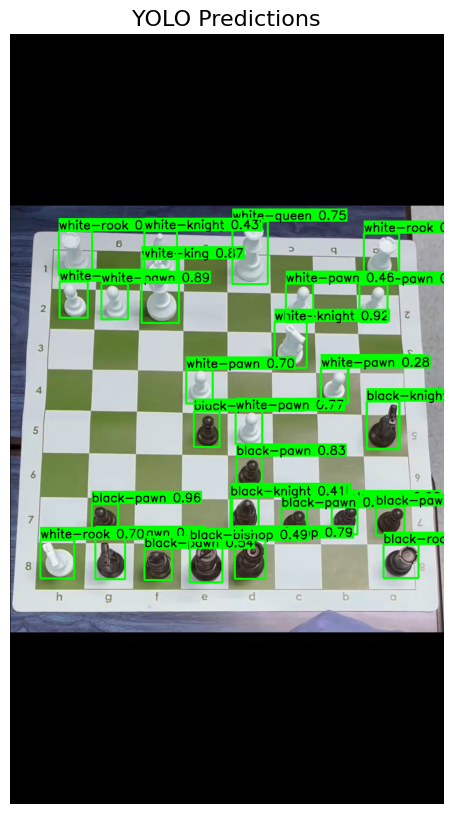

In [17]:
results = model.predict("frame0.jpg", imgsz=640)
visualize_yolo_predictions(results)

# Main

In [ ]:
# This function will be used for marking, do not change function name, input parameters and return parameters of this function
import cv2
import matplotlib.pyplot as plt
import numpy as np



def chess_move(video_name):
  # Input : video filename (.mp4)
  # Output : Chess moves for each video
  moves = ""
  i = 0

  # Create a VideoCapture object
  cap = cv2.VideoCapture(video_name)

  # Check if the video opened successfully
  if not cap.isOpened():
      print("Error opening video file")

  # Read and display frames until the video ends or 'q' is pressed
  while cap.isOpened():
    ret, frame = cap.read()
    if ret and i == 0:
        # Display only the first frame
        plt.imshow(frame[:,:,::-1])
        i += 1
    else:
        break

    # Release the video capture object and close display windows
    cap.release()

    # Write your code here to extract the move from the image

  return moves

# Marking

In [ ]:
!pip install editdistance
!pip install opencv-python

In [ ]:
!wget https://drive.google.com/uc?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR -O chess_solution_final_seen.csv

--2025-04-22 04:27:22--  https://drive.google.com/uc?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR
Resolving drive.google.com (drive.google.com)... 173.194.174.138, 173.194.174.139, 173.194.174.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.174.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR [following]
--2025-04-22 04:27:23--  https://drive.usercontent.google.com/download?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.189.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963 [application/octet-stream]
Saving to: ‘chess_solution_final_seen.csv’

chess_solution_fina 100%[===================>]     963  --.-KB/s    in 0s      

2025-04-22 04:27:26 (40

## Download .mp4 file

In [ ]:
import subprocess

def download_file(url, filename=None):
    """
    Downloads a file from the specified URL using wget.

    Parameters:
        url (str): The URL of the file to download.
        output_directory (str, optional): The directory to save the downloaded file.
    """
    # Construct the wget command
    cmd = ['wget', url]
    if filename:
        cmd.extend(['-O', filename])

    try:
        # Execute the wget command
        print(cmd)
        subprocess.run(cmd, check=True)
        print(f"Downloaded {url} successfully.")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")


In [ ]:
# Load videos (or you can upload videos here manually)
f = open('chess_solution_final_seen.csv','r')

for line in f:
  video_name, moves_sol, p,link = line.split(',')
  idx = link.find('/d/')
  idx2 = link.find('/',idx+3)
  print(link[idx+3:idx2])
  url = 'https://drive.google.com/uc?id=' + link[idx+3:idx2]
  download_file(url, video_name)



nk
['wget', 'https://drive.google.com/uc?id=nk', '-O', 'row_id']
An error occurred: Command '['wget', 'https://drive.google.com/uc?id=nk', '-O', 'row_id']' returned non-zero exit status 8.
182pRqfn8ooNudYhsndYWgyBNi7rAV659
['wget', 'https://drive.google.com/uc?id=182pRqfn8ooNudYhsndYWgyBNi7rAV659', '-O', '2_Move_rotate_student.mp4']
Downloaded https://drive.google.com/uc?id=182pRqfn8ooNudYhsndYWgyBNi7rAV659 successfully.
16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh
['wget', 'https://drive.google.com/uc?id=16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh', '-O', '2_move_student.mp4']
Downloaded https://drive.google.com/uc?id=16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh successfully.
1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN
['wget', 'https://drive.google.com/uc?id=1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN', '-O', '4_Move_studet.mp4']
Downloaded https://drive.google.com/uc?id=1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN successfully.
1PLPjM--hR3KrCruOmbniftf1oaI216IS
['wget', 'https://drive.google.com/uc?id=1PLPjM--hR3KrCruOmbniftf1oaI216IS', '-O', '

## Scoring your output

Error opening video file
your result:  
solution   :  output
The edit distance between your results and solution is 0.0.
your result:  
solution   :  1. Qh4+ 2. g3
The edit distance between your results and solution is 0.0.
your result:  
solution   :  1. Qh4+ 2. g3
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. f4 2. Ng6 fxg3 3. Nxh8
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. Bxb5 2. Rxb5 b6 3. c4 Ne7 4. Rb2
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. Qe6 Kd8 2. Qf7 c6 3. Qf2 cxd5 4. Qxa7 Rc8 5. Rxb4 Nc6 6. Qb6+
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. f4 d5 2. Nf3 Bf5 3. Nc3 Nc6 4. Nxd5 e6 5. Ne3 Qh4+ 6. Nxh4 Nh6 7. Nxf5 Nxf5 8. Nxf5 exf5 9. d4 Nxd4 10. Qxd4 Rd8 11. Qe5+ Kd7 12. Qxf5+ Kc6 13. Qxf

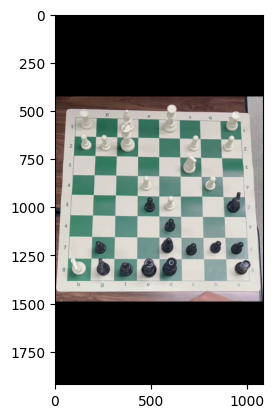

In [ ]:
# Read videos
import editdistance

f = open('chess_solution_final_seen.csv','r')
score = 0
n = 0
for line in f:
  video_name, moves_sol, p,link = line.split(',')
  moves = chess_move(video_name)
  s = 1 - editdistance.eval(moves,moves_sol)  / max(len(moves),len(moves_sol))
  score += s
  print(f"your result: ",moves)
  print(f"solution   : ",moves_sol )
  print(f"The edit distance between your results and solution is {s}.")
  n += 1
f.close()
if n != 0:
  print("-----------------------")
  print("Total score :",score/n)
  print("-----------------------")

